In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
dataframe = pd.read_csv("new-jersey-history.csv")
print(dataframe.keys())
print(dataframe)

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

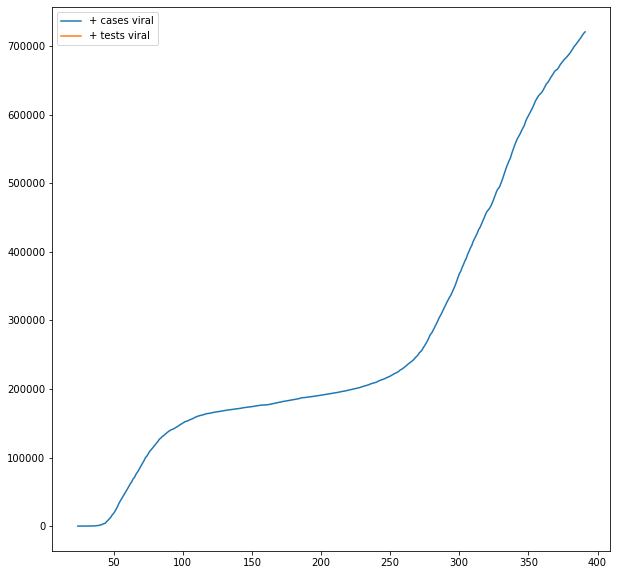

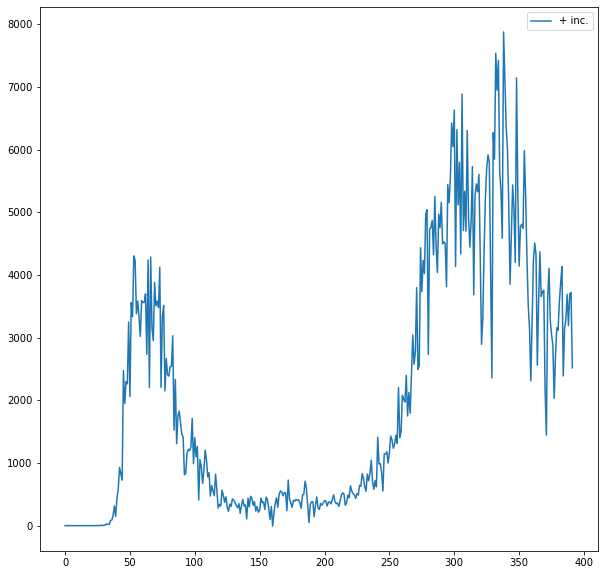

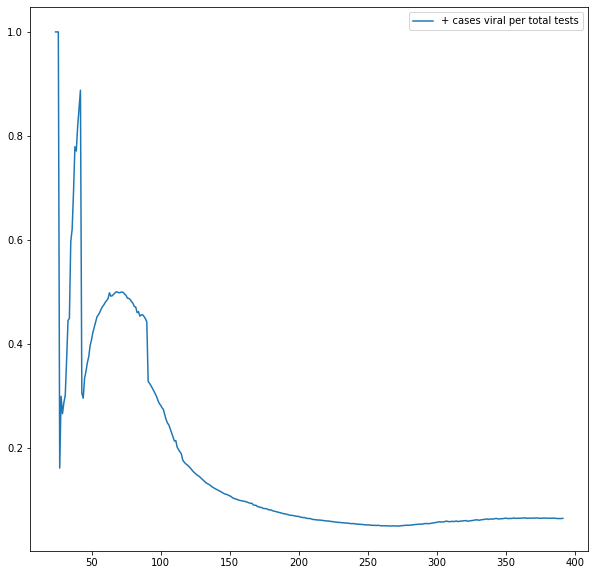

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(np.array(dataframe["positiveCasesViral"])[::-1], label="+ cases viral")
plt.plot(np.array(dataframe["positiveTestsViral"])[::-1], label="+ tests viral")
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
#plt.plot(np.array(dataframe["hospitalizedIncrease"])[::-1], label="hospitalized inc.")
plt.plot(np.array(dataframe["positiveIncrease"])[::-1], label="+ inc.")
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(np.array(dataframe["positiveCasesViral"])[::-1]/np.array(dataframe["totalTestResults"])[::-1], 
         label="+ cases viral per total tests")
#plt.plot(np.array(dataframe["totalTestResults"])[::-1], label="total cases")
plt.legend()
plt.show()

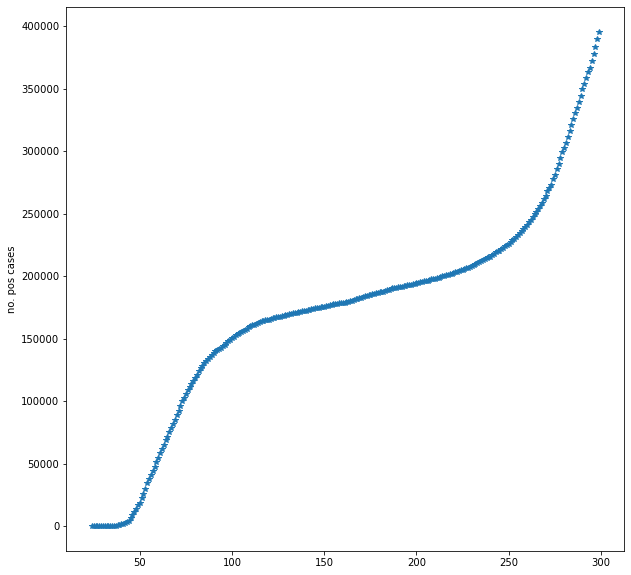

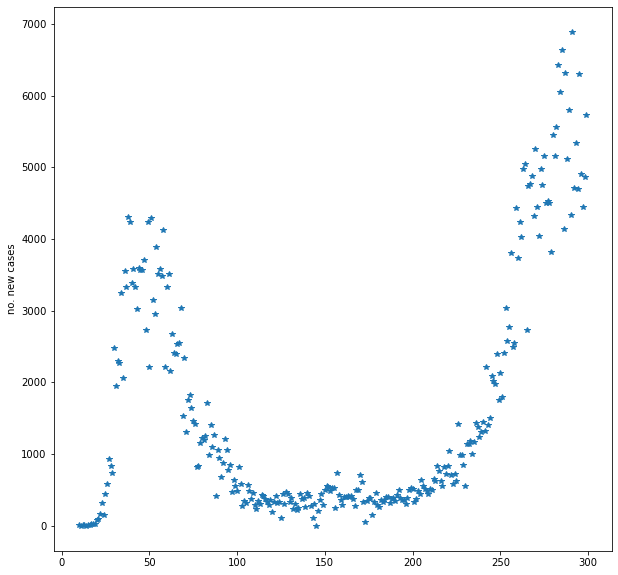

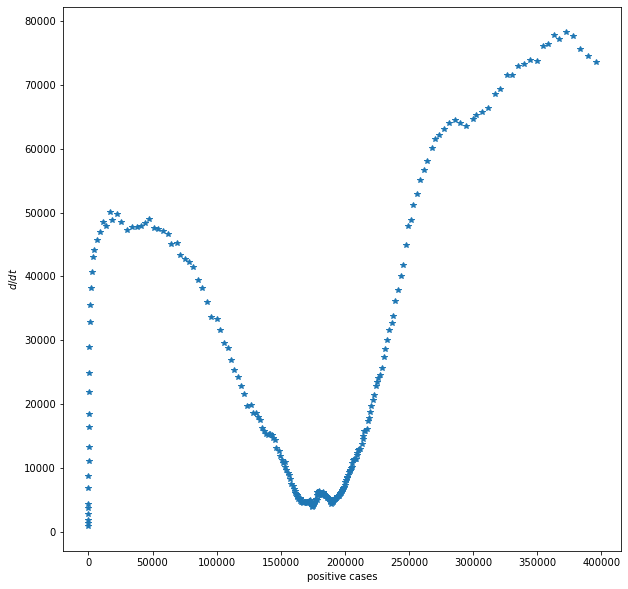

In [119]:
date = np.array(dataframe["date"][::-1])
pos_cases = np.array(dataframe["positive"][::-1])

differences = pos_cases[1:] - pos_cases[:-1]
second_differences = differences[1:] - differences[:-1]
trim = 300

plt.figure(figsize=(10, 10))
plt.plot(pos_cases[:trim], "*")
#plt.xlabel("no. cases + ")
plt.ylabel("no. pos cases")
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(differences[14:trim+14], "*")
#plt.xlabel("no. cases + ")
plt.ylabel("no. new cases")
plt.show()

moving_average_current_infected = np.convolve(np.ones(14), differences)
plt.figure(figsize=(10, 10))
plt.plot(pos_cases[:trim], moving_average_current_infected[14:trim+14], "*")
plt.xlabel("positive cases")
plt.ylabel("$d / dt$")
plt.show()

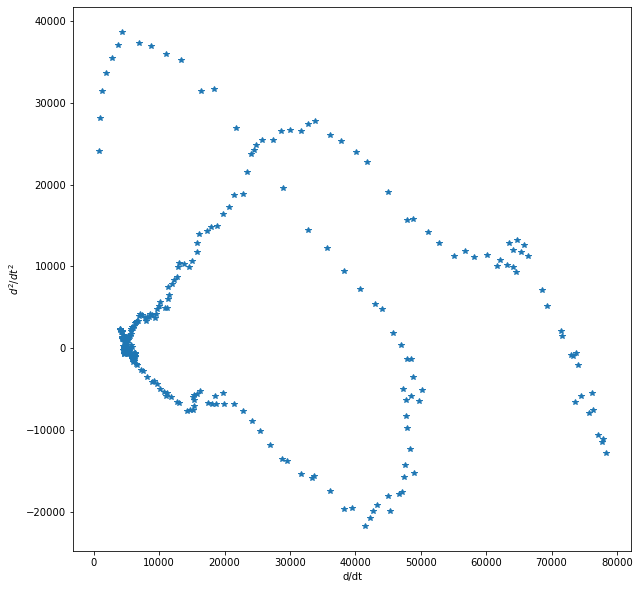

In [121]:
plt.figure(figsize=(10, 10))
plt.plot(moving_average_current_infected[14:trim+14], 
         moving_average_current_infected[28:trim+28] - moving_average_current_infected[14:trim+14], "*")
plt.xlabel("d/dt")
plt.ylabel("$d^2 / dt^2$")
plt.show()

In [36]:
print(date[50])
print(date[100])
print(date[200])
print(date[214])

2020-03-31
2020-05-20
2020-08-28
2020-09-11


In [37]:
from sklearn.cluster import KMeans

In [75]:
subframe = dataframe[["positiveCasesViral", "positiveIncrease"]]
subframe = subframe.dropna(axis="rows")
print(subframe)
n = len(subframe["positiveCasesViral"])
X = np.zeros([n, 2])
X[:, 0] = np.array(subframe["positiveCasesViral"])
X[:, 1] = np.array(subframe["positiveIncrease"])
Y = -(X[1:, :] - X[:-1, :])

fitter = KMeans(n_clusters=2)
fitter.fit(Y)


     positiveCasesViral  positiveIncrease
0              720939.0              2519
1              718873.0              3720
2              715889.0              3701
3              712585.0              3193
4              710046.0              3691
..                  ...               ...
363                15.0                 9
364                 6.0                 2
365                 4.0                 0
366                 4.0                 2
367                 2.0                 2

[368 rows x 2 columns]


KMeans(n_clusters=2)

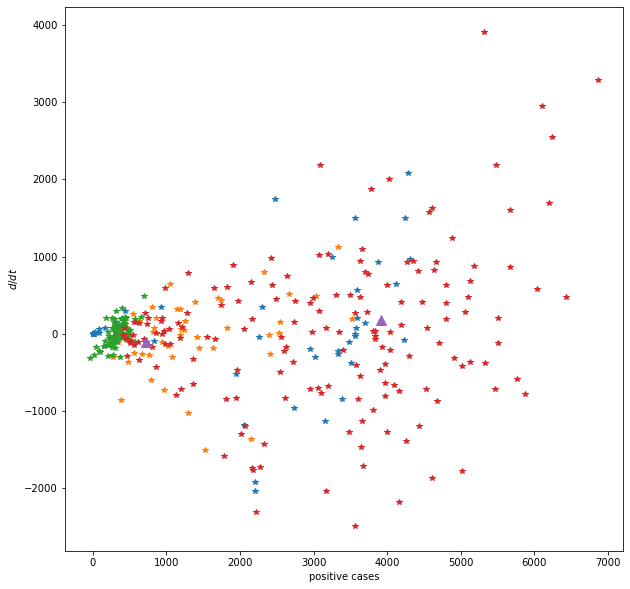

In [82]:
plt.figure(figsize=(10, 10))
plt.plot(Y[-50:, 0], Y[-50:, 1], "*")
plt.plot(Y[-100:-50, 0], Y[-100:-50, 1], "*")
plt.plot(Y[-200:-100, 0], Y[-200:-100, 1], "*")
plt.plot(Y[:-200, 0], Y[:-200, 1], "*")

plt.plot(fitter.cluster_centers_[:, 0], fitter.cluster_centers_[:, 1], "^", 
        markersize=10)
plt.xlabel("positive cases")
plt.ylabel("$d / dt$")
plt.show()

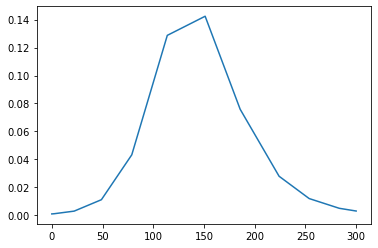

In [110]:
from scipy.integrate import solve_ivp
def fun(t, x, a, b):
    ddt = np.zeros(3)
    ddt[0] = -a * x[0] * x[1]
    ddt[1] = -ddt[0] - b * x[1]
    ddt[2] = b * x[1]
    return ddt

init = np.array([1, 0.001, 0])
params = [0.1, 0.05]
sol = solve_ivp(fun, [0, 300], init, args=params)
plt.plot(sol.t, sol.y[1, :])
plt.show()